In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps

from scipy.signal import find_peaks
from scipy import signal

import tifffile as tf

In [2]:
oog = OG.BasicOpticalGating().default()
oog.run()

Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif
Getting SADs
Getting phases


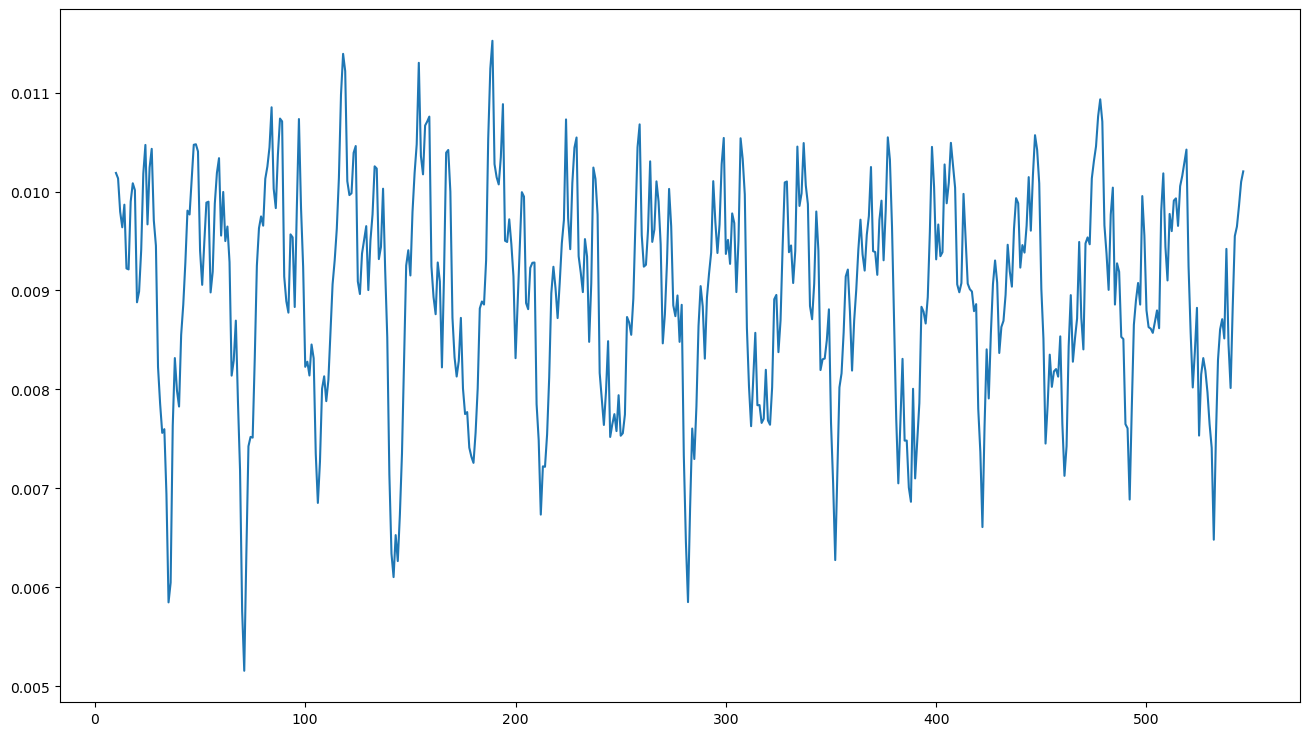

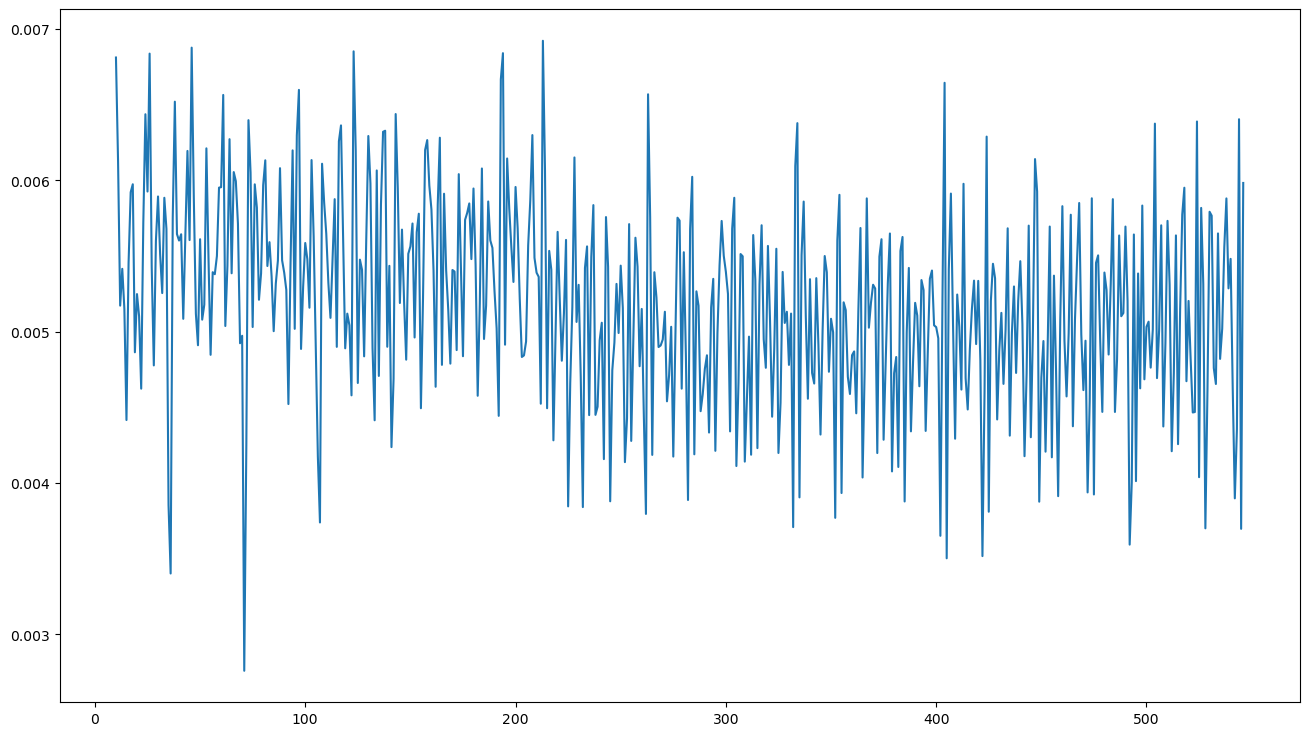

In [27]:
# Gets the noise spectrum by looking at the standard deviation of the change in delta phases over some time period.
def get_noise_spectrum(delta_phases, averaging_window):
    time_windows = range(averaging_window, (delta_phases.shape[0] - averaging_window) // 2)
    avg_delta_phases_std = []
    for time_window in time_windows:
        avg_delta_phases = []
        for i in np.arange(0, delta_phases.shape[0] - time_window - averaging_window, averaging_window):
            average_delta_phase_init = np.mean(delta_phases[i:i + averaging_window])
            average_delta_phase_final = np.mean(delta_phases[i + time_window:i + time_window + averaging_window])

            est_avg_delta_phases = average_delta_phase_init - average_delta_phase_final

            avg_delta_phases.append(est_avg_delta_phases)

        avg_delta_phases_std.append(np.std(avg_delta_phases))

    return time_windows, avg_delta_phases_std

time_windows, avg_delta_phases_std = get_noise_spectrum(oog.delta_phases, 10)
plt.figure(figsize = (16,9))
plt.plot(time_windows, avg_delta_phases_std)
plt.show()

time_windows, avg_delta_phases_std = get_noise_spectrum(np.diff(oog.delta_phases), 10)
plt.figure(figsize = (16,9))
plt.plot(time_windows, avg_delta_phases_std)
plt.show()

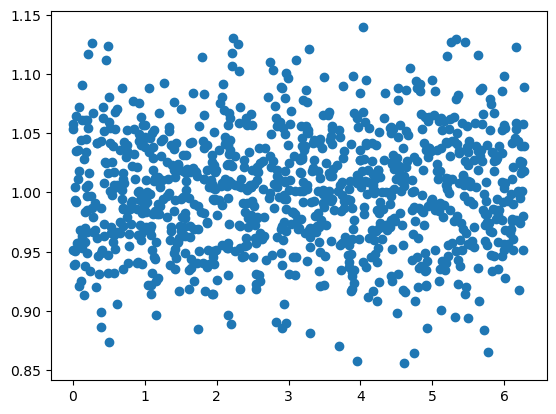

In [28]:
delta_phases_synthetic = np.random.normal(1, 0.05, 1000)# + np.cumsum(np.random.normal(0, 0.01, 1000))
phases_synthetic = np.cumsum(delta_phases_synthetic) % (2 * np.pi)

plt.scatter(phases_synthetic, delta_phases_synthetic)

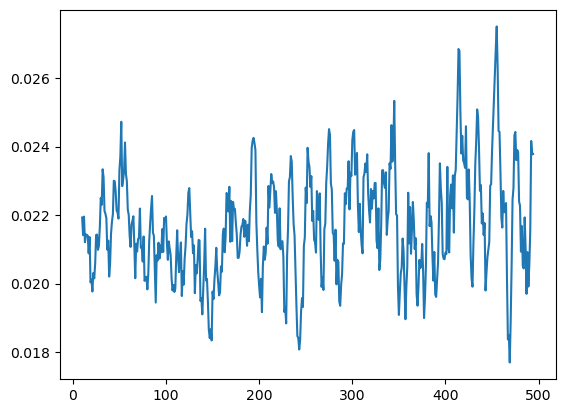

In [29]:
plt.plot(*get_noise_spectrum(delta_phases_synthetic, 10))